# Part II - (Prosper Loan Dataset)
## by (OBI UCHECHI LYDIA)

## Investigation Overview


The main purpose is to deduced the variables that might affect the loa status ad also to get ideas aout their relationship using statistics and visualization.


## Dataset Overview

The dataset is a loan data named Prosper loan. The data contains 113937, and 81 variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
Loan = pd.read_csv('prosperLoanData.csv')
Loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Data Cleaning
1. Remove all duplicated rows in the dataset
2. dropping all missing and Null values the dataset
3. drop coulums that are not needed.

In [3]:
#Drop coulums that are not needed.

Loan.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate','CreditGrade', 'ClosedDate','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)',
'ProsperRating (Alpha)', 'ProsperScore','GroupKey','CurrentlyInGroup','DateCreditPulled','EmploymentStatusDuration',
'CreditScoreRangeLower','CreditScoreRangeUpper','FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
'OpenCreditLines','TotalCreditLinespast7years','OpenRevolvingAccounts','OpenRevolvingMonthlyPayment','InquiriesLast6Months',
'TotalInquiries','CurrentDelinquencies','AmountDelinquent','DelinquenciesLast7Years','PublicRecordsLast10Years', 
'PublicRecordsLast12Months','RevolvingCreditBalance','BankcardUtilization', 'TradesOpenedLast6Months', 
'AvailableBankcardCredit','LoanOriginationQuarter','LoanKey','TotalProsperLoans','TotalProsperPaymentsBilled',
'OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalOutstanding',
'ProsperPrincipalBorrowed','IncomeVerifiable','ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent',
'LoanFirstDefaultedCycleNumber','LoanMonthsSinceOrigination','LoanOriginationDate', 'MemberKey','LP_CustomerPayments',
'LP_CustomerPrincipalPayments','LP_InterestandFees','LP_ServiceFees', 'LP_CollectionFees','LP_GrossPrincipalLoss',
'LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments','Recommendations','InvestmentFromFriendsCount',
'InvestmentFromFriendsAmount'], axis = 1, inplace = True)

In [4]:
##### Remove all duplicated rows in the dataset
Loan.duplicated().value_counts()
LoanP = Loan.drop_duplicates()

In [5]:
#dropping all duplicate and renaming the dataset
LoanP = Loan.drop_duplicates()

In [6]:
LoanP.duplicated().value_counts()

False    113066
dtype: int64

### What is the structure of your dataset?
The dataset contains 94,883 loans with 20 features.

### What is/are the main feature(s) of interest in your dataset?
I am interested to explore selected features to have a big insight of the data such as Employment status, Loan status, Stated monthly income and others.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Most of the features are interesting. However, I will investigate on the features I beleive will help in achiveing a proper insight for the purpose of this project.

## Univariate Exploration

In [7]:
LoanP['Term'].value_counts()

36    87224
60    24228
12     1614
Name: Term, dtype: int64

Text(0.5, 0, 'Term(Months)')

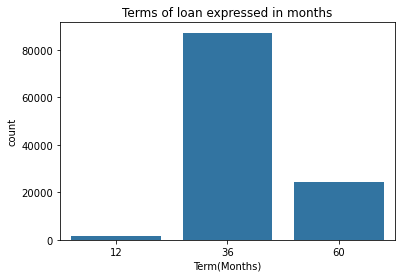

In [8]:
plt.title('Terms of loan expressed in months');
base_color = sb.color_palette()[0]
sb.countplot(data=LoanP, x='Term', color=base_color);
plt.xlabel('Term(Months)')

Slide Type
Sub-Slide
This graph shows the relationship of terms expressed i months. From the graph, we can deduced that 36 months shows that highest loan counts, followed by 60 months while 12 months recorded the least.

Text(0.5, 0, 'Borrower APR Distribution')

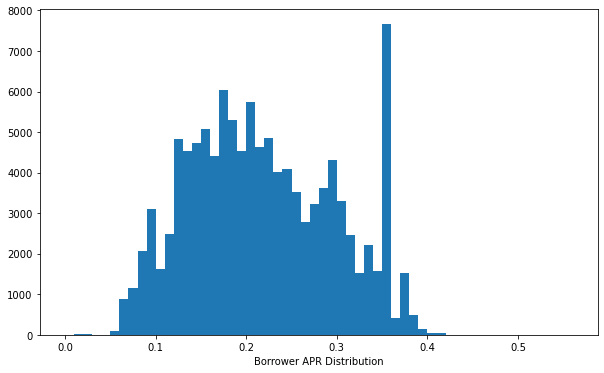

In [9]:
plt.figure(figsize=[10,6])
bins = np.arange(0, LoanP['BorrowerAPR'].max()+0.05,0.01)
plt.hist(x = LoanP['BorrowerAPR'],bins = bins);
plt.xlabel('Borrower APR Distribution')

From the diagram above, the maximum APR is within 0.3 and 0.36, while the minimum 0.01 aand 0.02

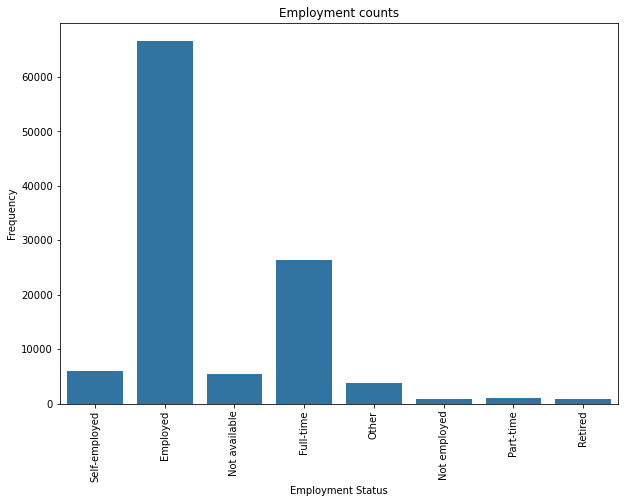

In [10]:
plt.figure(figsize=(10,7))
based_color = sb.color_palette()[0]
#sb.countplot(x=LoanP ['Term']);
sb.countplot(x=LoanP ['EmploymentStatus'],color=base_color);
plt.xticks(rotation=90)
plt.xlabel('Employment Status')
plt.ylabel('Frequency')
plt.title('Employment counts');


This is one of the interest observation obtained in the project. The graph shows

bins = np.arange(0,LoanP['BorrowerRate'].max()+0.01,0.01)
plt.figure(figsize=[10,5])
plt.hist(x='BorrowerRate',data=LoanP, bins=bins)
plt.xlabel('BORROWER RATE')
plt.ylabel('COUNT')
plt.title('GRAPH REPRESENTING BORROWER RATE')

The borrowers APR is multimodal. I observed that most of the distribution is normal with relatively high frequencies. I further perform some transformation on stated monthly income, monthly loan payment, and loan original amount.

## Bivariate Exploration

In [11]:
num_var = ['Term', 'BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'DebtToIncomeRatio']
cat_var = ['IncomeRange', 'EmploymentStatus', 'LoanStatus', 'Occupation']

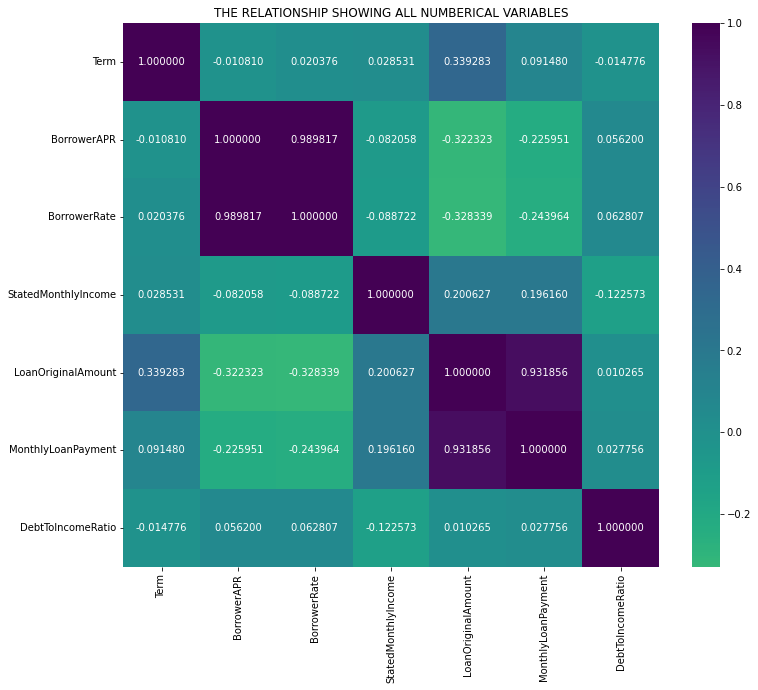

In [12]:
#plot for correlation
plt.figure(figsize = (12,10))
sb.heatmap(LoanP[num_var].corr(), annot = True, fmt = '3f', 
           cmap = 'viridis_r', center = 0);
plt.title('THE RELATIONSHIP SHOWING ALL NUMBERICAL VARIABLES')
plt.show()

<Figure size 720x720 with 0 Axes>

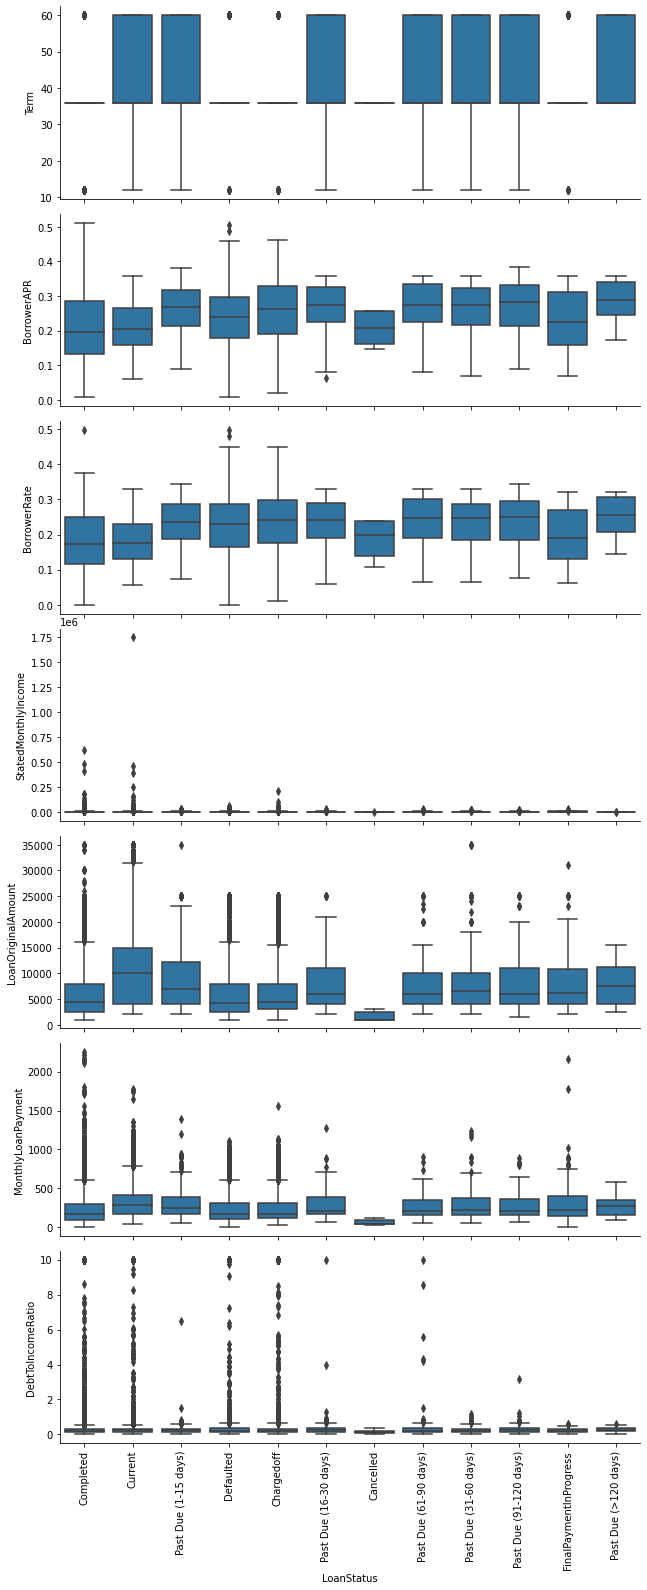

In [13]:
def boxplott(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    color = sb.color_palette()[0]
    sb.boxplot(x, y, color=color)
    plt.xticks(rotation=90);

plt.figure(figsize = (10, 10))
g = sb.PairGrid(data = LoanP, y_vars = num_var, x_vars = 'LoanStatus', 
                size = 3, aspect = 3)
g.map(boxplott);

<Figure size 2160x720 with 0 Axes>

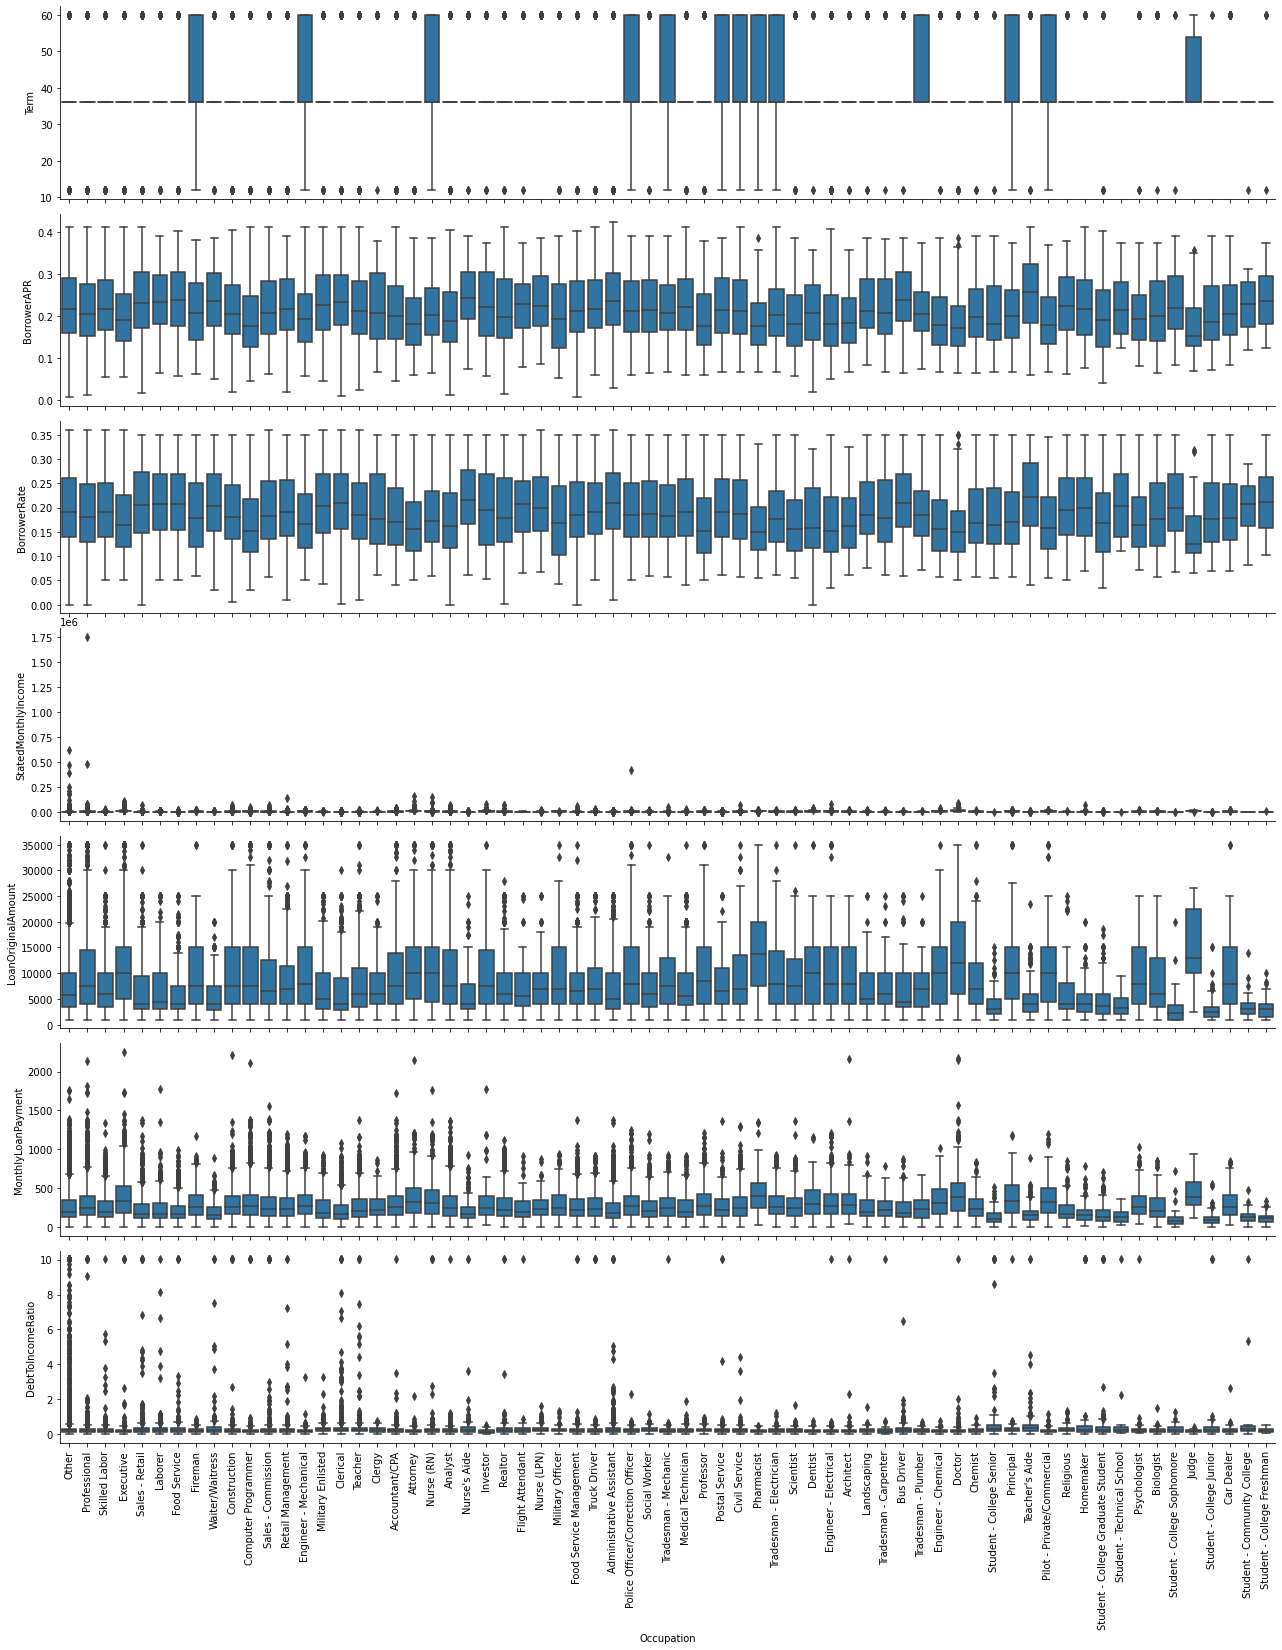

In [14]:
plt.figure(figsize = (30,10))
nv = sb.PairGrid(data = LoanP, y_vars = num_var, x_vars = 'Occupation',
                size = 3, aspect = 6)
nv.map(boxplott);

#### creating a new variable 'status'

In [15]:
LoanP['Status'] = np.where((LoanP['LoanStatus'] == 'Current')|
                          (LoanP['LoanStatus'] == 'Completed')|
                          (LoanP['LoanStatus'] == 'Cancelled'),
                          'Completed', 'Defaulted')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Self-employed'),
  Text(1, 0, 'Employed'),
  Text(2, 0, 'Not available'),
  Text(3, 0, 'Full-time'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Not employed'),
  Text(6, 0, 'Part-time'),
  Text(7, 0, 'Retired')])

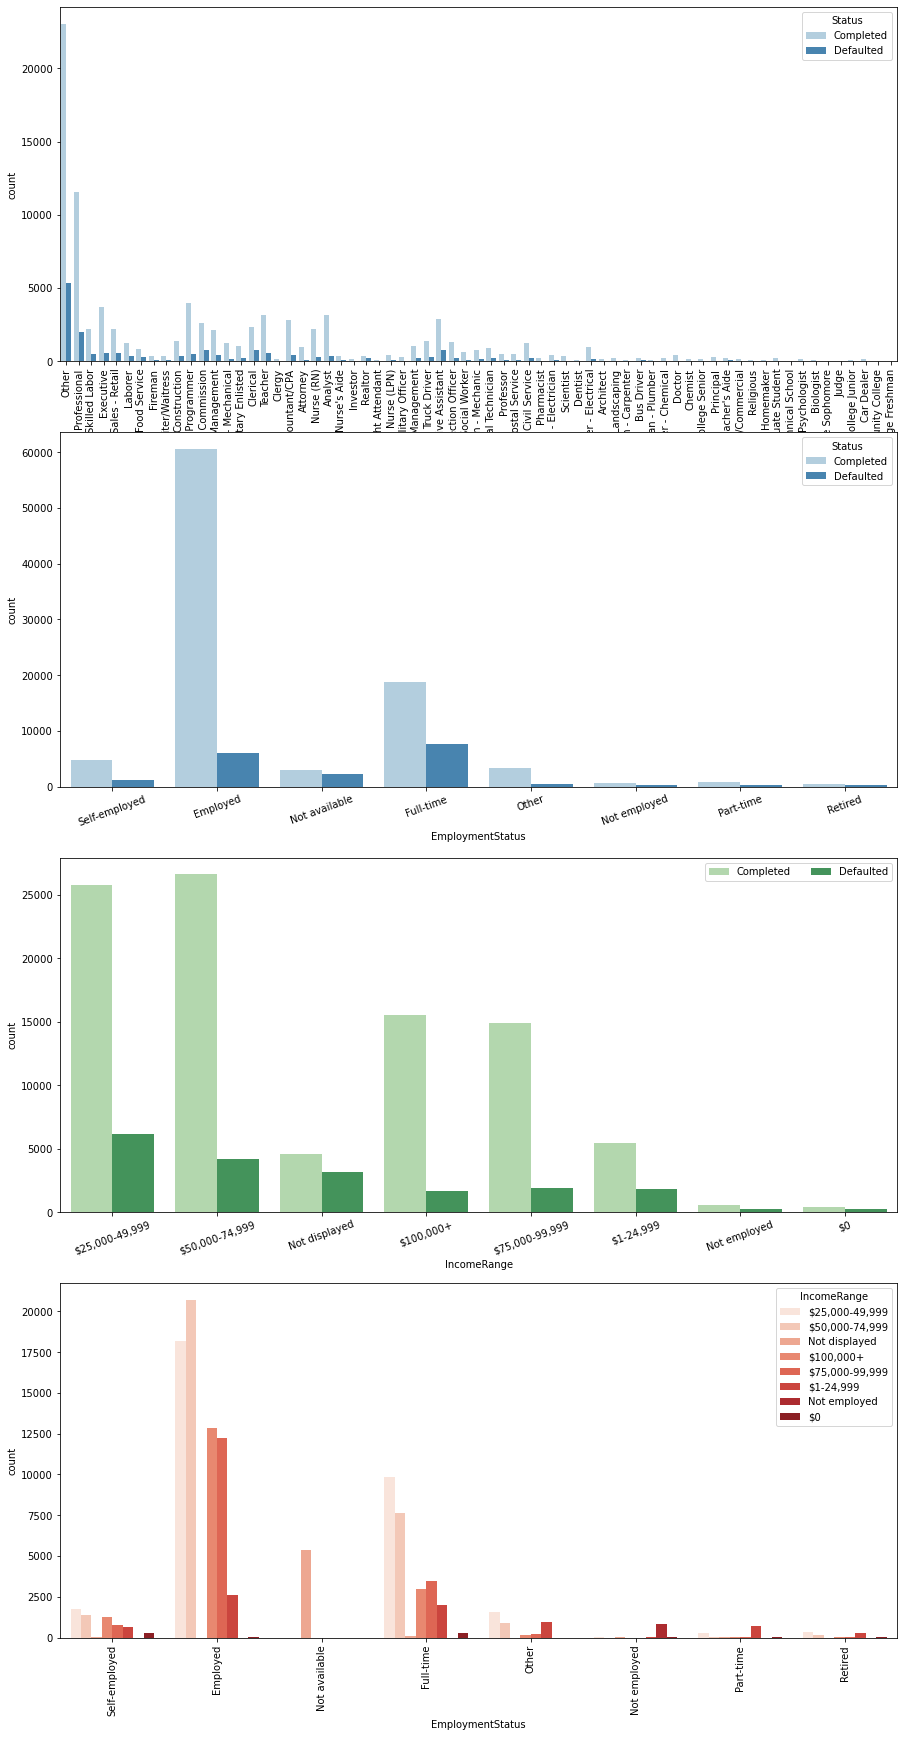

In [16]:
plt.figure(figsize = (15,30))
#subplot 1: IncomingRange vs LoanStatus

plt.subplot(4,1,1)
sb.countplot(data = LoanP, x = 'Occupation', hue = 'Status', palette = 'Blues')
plt.xticks(rotation = 90)

#subplot 2: LoanStatus vs EmploymentStatus
ax = plt.subplot(4,1,2)
sb.countplot(data = LoanP, x = 'EmploymentStatus', hue = 'Status', palette = 'Blues')
plt.xticks(rotation = 20)

#subplot 3: 
ax = plt.subplot(4,1,3)
sb.countplot(data = LoanP, x = 'IncomeRange', hue = 'Status', palette = 'Greens')
#rearrange the lengend to remove overlapping
ax.legend(loc = 1, ncol = 2); 
plt.xticks(rotation = 20)

#subplot4: EmploymentStatus vs IncomeRange
ax = plt.subplot(4,1,4)
sb.countplot(data = LoanP, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Reds')
plt.xticks(rotation = 90)

I observed that students take the lowest loan original amount while those with high monthly salary take high loan
The loan status for the past dues have a high interest rate while the Number of defaulted loans for self-employed people are larger than those employed.

Between monthly income and loan status, there is a negative correlation due to income been low.
BorrowerAPI was high for less loan less loan and low for high low amount.
There is also a moderate correlation between BorrowerAPR and monthly income which indicate that while both variables tend to go down.

## Multivariate Exploration

The relationship betwwen EmploymentStatus and BorrowerAPR and Status

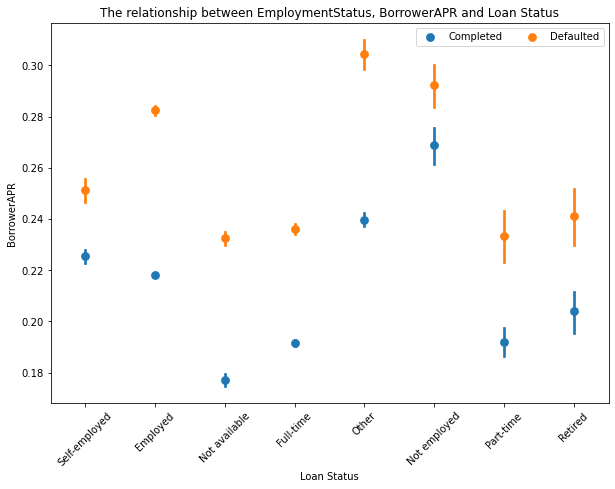

In [17]:
plt.figure(figsize=[10,7])
sb.pointplot(data=LoanP, x='EmploymentStatus', y='BorrowerAPR', hue='Status', linestyles="");
plt.title('The relationship between EmploymentStatus, BorrowerAPR and Loan Status');
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');
plt.xticks(rotation = 45);
plt.legend(ncol=3);

The graph shows that the Borrower APR is higher in defaulter

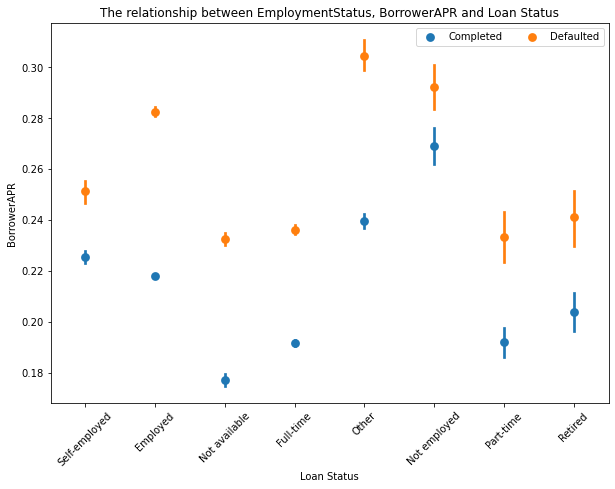

In [18]:
plt.figure(figsize=[10,7])
sb.pointplot(data=LoanP, x='EmploymentStatus', y='BorrowerAPR', hue='Status', linestyles="");
plt.title('The relationship between EmploymentStatus, BorrowerAPR and Loan Status');
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');
plt.xticks(rotation = 45);
plt.legend(ncol=3);

In [24]:
!jupyter nbconvert --to slides http://localhost:8888/notebooks/Desktop/UDACITY%20PROJECT/Prosper%20Loan%20Dataset%202.ipynb


This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,


[NbConvertApp] WARNING | pattern 'http://localhost:8888/notebooks/Desktop/UDACITY%20PROJECT/Prosper%20Loan%20Dataset%202.ipynb' matched no files


as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default beh

In [25]:
!jupyter nbconvert 'http://localhost:8888/notebooks/Desktop/UDACITY%20PROJECT/Prosper%20Loan%20Dataset%202.ipynb' --to slides --post serve --no-input --no-p

This application is used to convert notebook files (*.ipynb)

[NbConvertApp] WARNING | pattern "'http://localhost:8888/notebooks/Desktop/UDACITY%20PROJECT/Prosper%20Loan%20Dataset%202.ipynb'" matched no files



        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue noteboo